In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = r'Part1 data/Canada/Average expenditures on innovation activities, by industry and enterprise size.csv'
canada_data = pd.read_csv(file_path)

# Canada's Expenditures in 2022

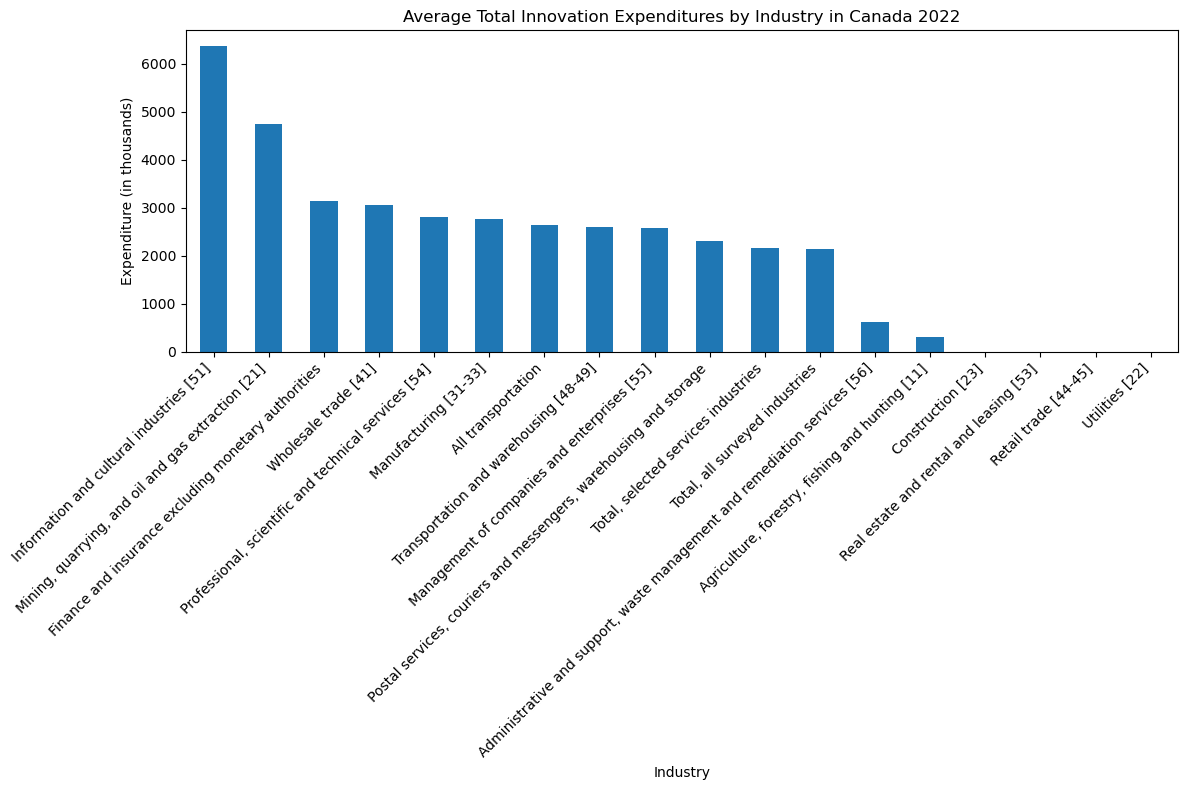

In [10]:
total_innovation = canada_data[
    canada_data['Expenditures on innovation activities'] == 'Total innovation expenditures'
]
total_innovation_2022 = total_innovation[total_innovation["REF_DATE"] == 2022]

industry_expenditures = total_innovation_2022.groupby(
    'North American Industry Classification System (NAICS)'
)['VALUE'].mean().sort_values(ascending=False)

# Plot the top industries by mean expenditure
plt.figure(figsize=(12, 8))
industry_expenditures.plot(kind='bar')
plt.title('Average Total Innovation Expenditures by Industry in Canada 2022')
plt.ylabel('Expenditure (in thousands)')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Finland's Expenditures in 2022

/var/folders/st/ygxnyth53pb99pxw1676p2qm0000gn/T/ipykernel_20484/2741947042.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restructured_data_cleaned['Main Industry'] = restructured_data_cleaned['Industry'].str[0]
/var/folders/st/ygxnyth53pb99pxw1676p2qm0000gn/T/ipykernel_20484/2741947042.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restructured_data_cleaned['Industry Name'] = restructured_data_cleaned['Main Industry'].map(filtered_mapping)


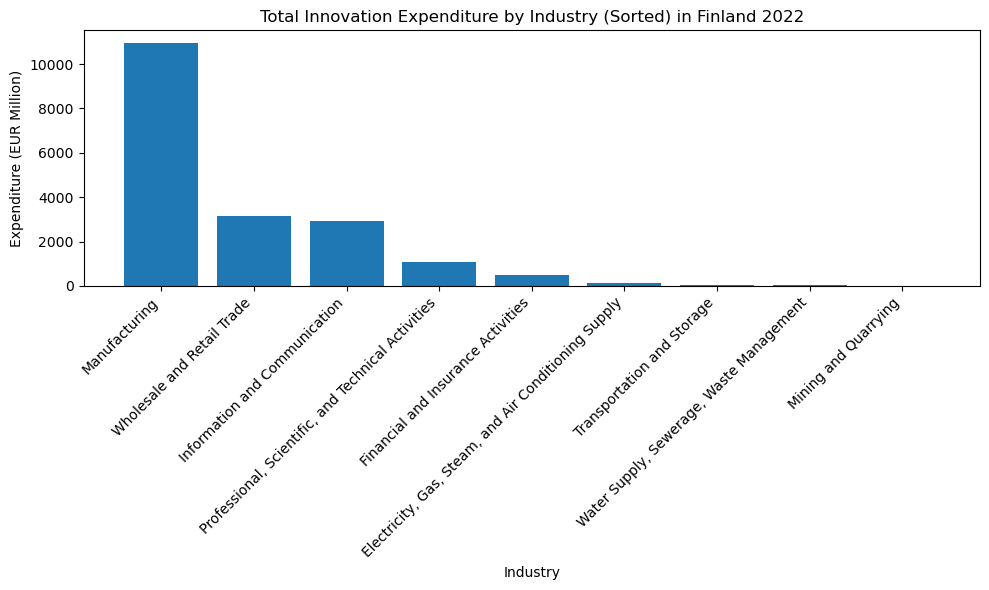

In [11]:
file_path = 'Part1 data/Finland/Enterprises innovation expenditure and turnover from innovations by industry 2022.txt'
data = pd.read_csv(file_path, sep="\t")
restructured_data = data.pivot_table(
    index=['Year', 'Industry'],
    columns='Information',
    values='Enterprises innovation expenditure and turnover from innovations by industry',
    aggfunc='first'
).reset_index()

# Rename columns for easier handling
restructured_data.columns = [
    'Year', 'Industry',
    'Total innovation expenditure, EUR million',
    'Total turnover of enterprises, EUR million',
    'Total turnover of enterprises with product innovations, EUR million'
]

# Convert numeric columns to appropriate types
numeric_columns = [
    'Total innovation expenditure, EUR million',
    'Total turnover of enterprises, EUR million',
    'Total turnover of enterprises with product innovations, EUR million'
]
restructured_data[numeric_columns] = restructured_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing numeric data
restructured_data_cleaned = restructured_data.dropna(subset=numeric_columns)

# Step 2: Extract the main industry code
restructured_data_cleaned['Main Industry'] = restructured_data_cleaned['Industry'].str[0]

# Step 3: Identify unique main industry codes in this dataset
unique_main_industries = restructured_data_cleaned['Main Industry'].unique()

# Step 4: Define the industry mapping
industry_mapping = {
    'A': 'Agriculture, Forestry, and Fishing',
    'B': 'Mining and Quarrying',
    'C': 'Manufacturing',
    'D': 'Electricity, Gas, Steam, and Air Conditioning Supply',
    'E': 'Water Supply, Sewerage, Waste Management',
    'F': 'Construction',
    'G': 'Wholesale and Retail Trade',
    'H': 'Transportation and Storage',
    'I': 'Accommodation and Food Service Activities',
    'J': 'Information and Communication',
    'K': 'Financial and Insurance Activities',
    'L': 'Real Estate Activities',
    'M': 'Professional, Scientific, and Technical Activities',
    'N': 'Administrative and Support Service Activities',
    'O': 'Public Administration and Defence',
    'P': 'Education',
    'Q': 'Human Health and Social Work Activities',
    'R': 'Arts, Entertainment, and Recreation',
    'S': 'Other Service Activities'
}

# Step 5: Filter the mapping for the unique main industries in this dataset
filtered_mapping = {k: v for k, v in industry_mapping.items() if k in unique_main_industries}

# Step 6: Map main industry codes to names
restructured_data_cleaned['Industry Name'] = restructured_data_cleaned['Main Industry'].map(filtered_mapping)

# Step 7: Aggregate data by main industry
aggregated_data = restructured_data_cleaned.groupby('Industry Name').agg(
    Total_Innovation_Expenditure=('Total innovation expenditure, EUR million', 'sum'),
    Total_Turnover=('Total turnover of enterprises, EUR million', 'sum'),
    Total_Turnover_From_Innovations=('Total turnover of enterprises with product innovations, EUR million', 'sum')
).reset_index()

# Step 8: Calculate derived metrics
aggregated_data['Innovation_Intensity (%)'] = (
    aggregated_data['Total_Innovation_Expenditure'] / aggregated_data['Total_Turnover'] * 100
)
aggregated_data['Innovation_Revenue_Share (%)'] = (
    aggregated_data['Total_Turnover_From_Innovations'] / aggregated_data['Total_Turnover'] * 100
)

aggregated_data_sorted = aggregated_data.sort_values(by='Total_Innovation_Expenditure', ascending=False)

# Bar chart for Total Innovation Expenditure
plt.figure(figsize=(10, 6))
plt.bar(aggregated_data_sorted['Industry Name'], aggregated_data_sorted['Total_Innovation_Expenditure'])
plt.title('Total Innovation Expenditure by Industry (Sorted) in Finland 2022')
plt.ylabel('Expenditure (EUR Million)')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Comparing Innovation Expenditures Between Canada and Finland (2022)

#### **1\. Finland's Key Insights**

-   **Top Industry**:
    -   Manufacturing leads significantly, with expenditures exceeding EUR 10 billion, showcasing its dominance in Finland's innovation ecosystem.
-   **Other Major Sectors**:
    -   Wholesale and Retail Trade, Information and Communication, and Professional, Scientific, and Technical Activities also contribute significantly to innovation investments.
-   **Smaller Contributors**:
    -   Sectors like Water Supply and Mining have relatively minor expenditures, indicating less innovation focus.

#### **2\. Canada's Key Insights**

-   **Top Industry**:
    -   Information and Cultural Industries dominate Canada's innovation spending, followed by Mining, Quarrying, and Oil and Gas Extraction.
-   **Manufacturing's Role**:
    -   Manufacturing ranks mid-tier in innovation expenditures, unlike Finland, where it is the largest contributor.
-   **Other Contributors**:
    -   Wholesale Trade, Professional, Scientific, and Technical Services are also key sectors for innovation investments.

#### **3\. Key Differences**

-   **Sectoral Focus**:
    -   Finland focuses heavily on **Manufacturing**, which is less emphasized in Canada.
    -   Canada prioritizes **Information and Cultural Industries** and **Natural Resource Extraction**, which are not as prominent in Finland's innovation landscape.
-   **Scale of Expenditure**:
    -   While the absolute expenditures differ due to economic size, the relative importance of sectors within each country varies significantly.

# Comparing to Top Innovative Countries

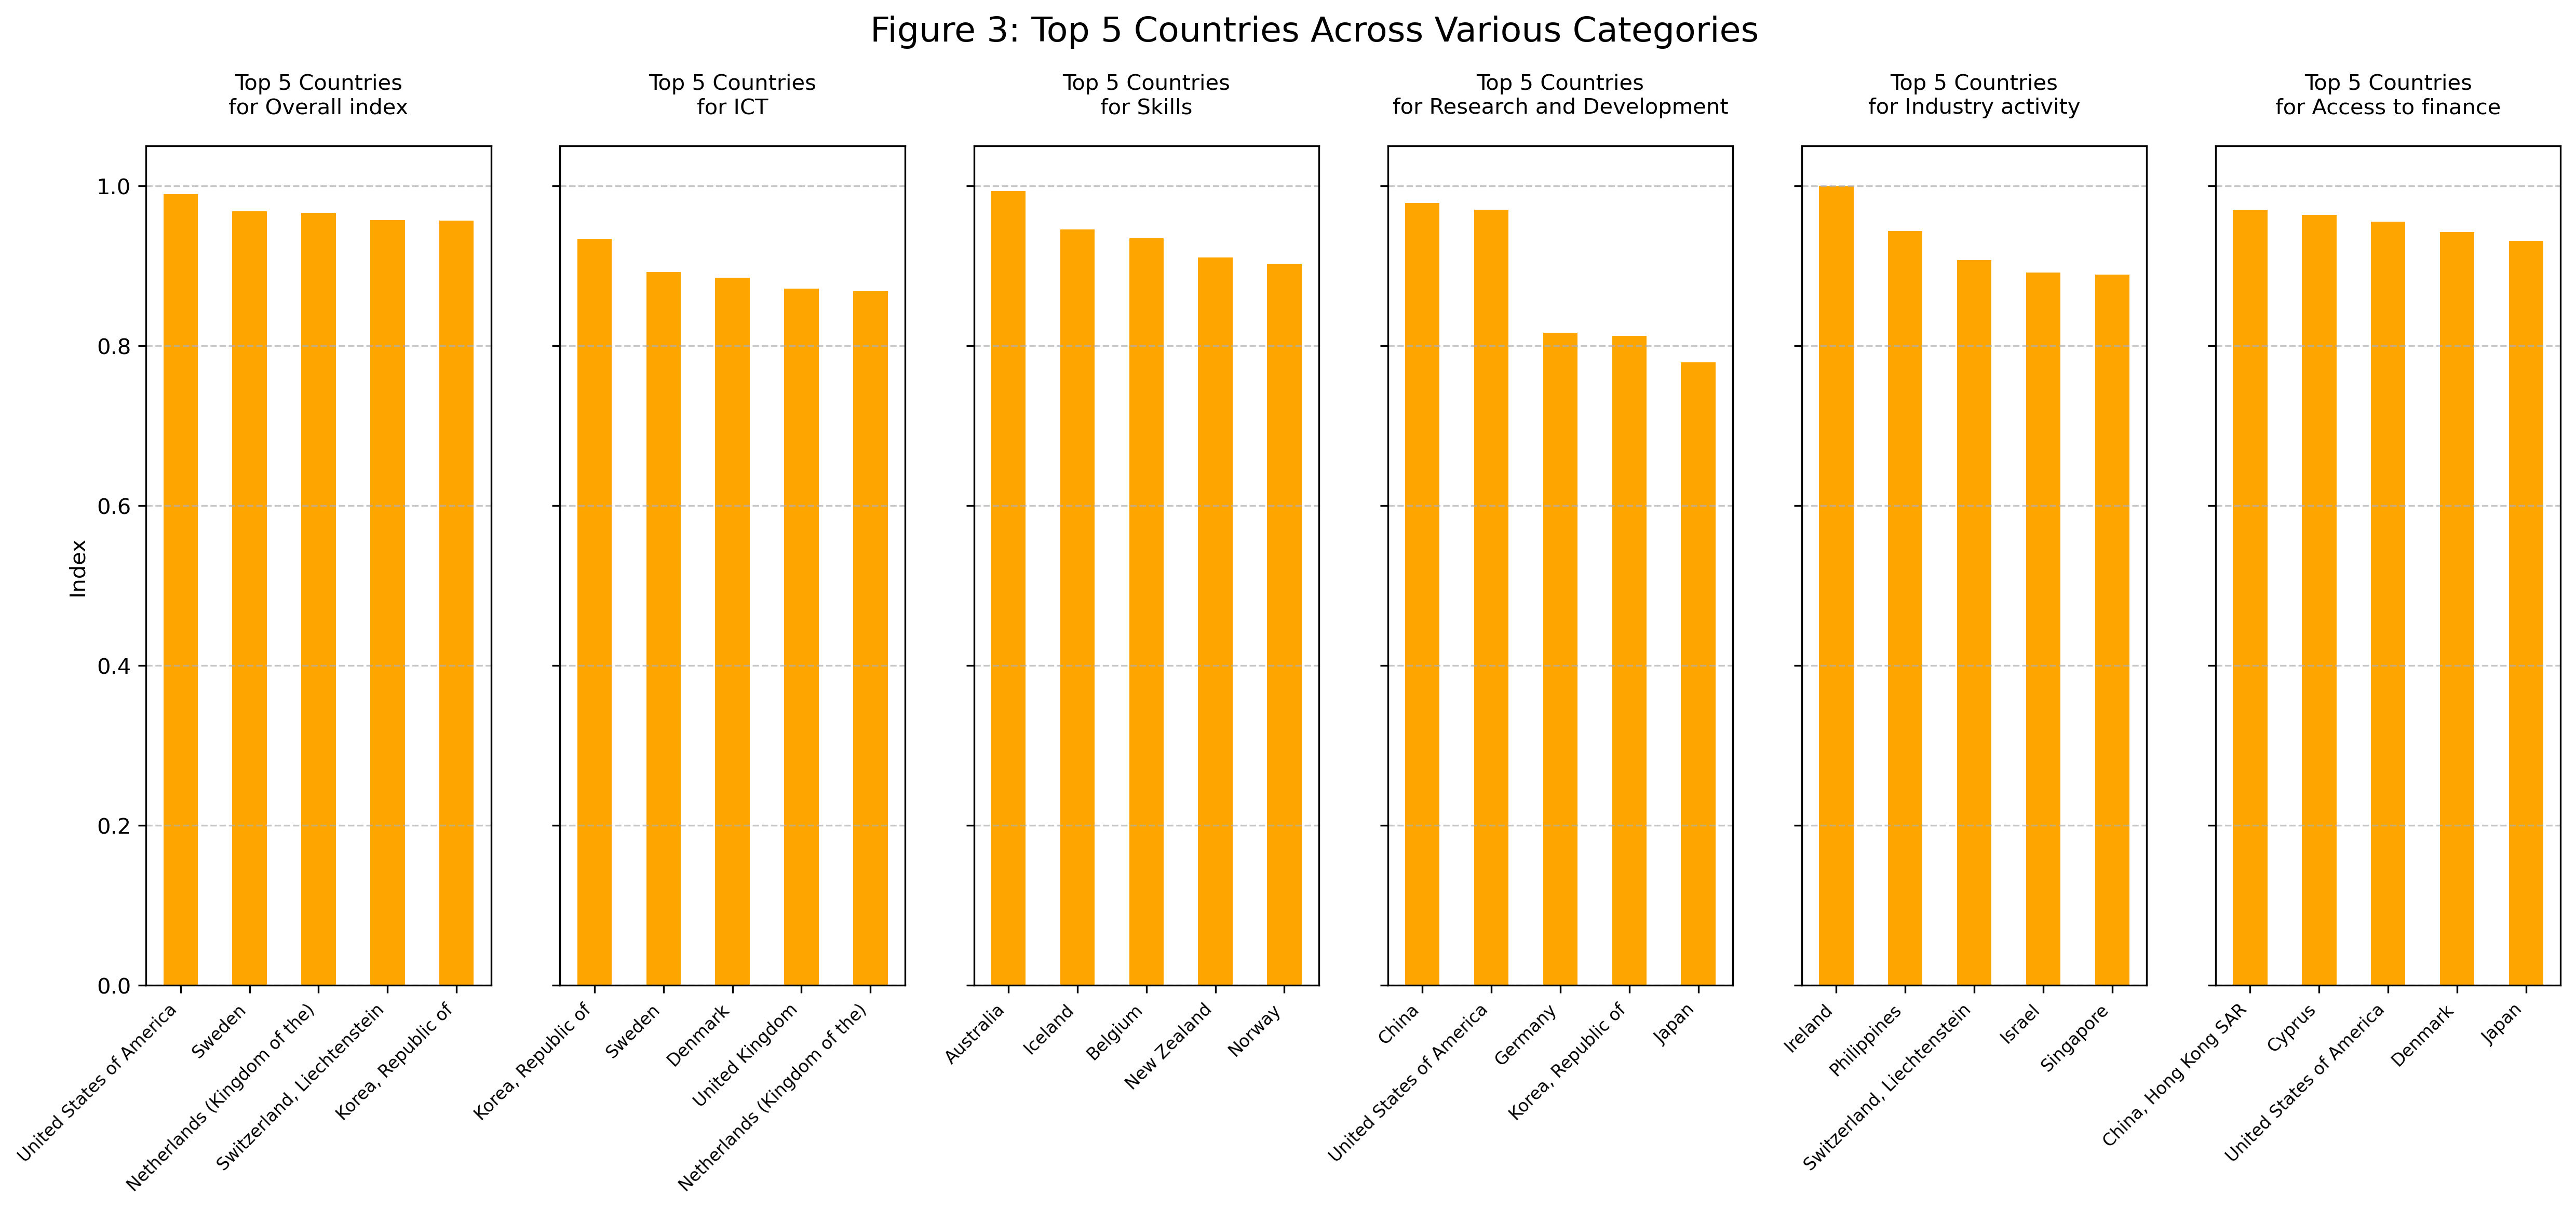

In [36]:
from IPython.display import Image
Image(filename='Part2_visualization/combined_top_5_countries.png')

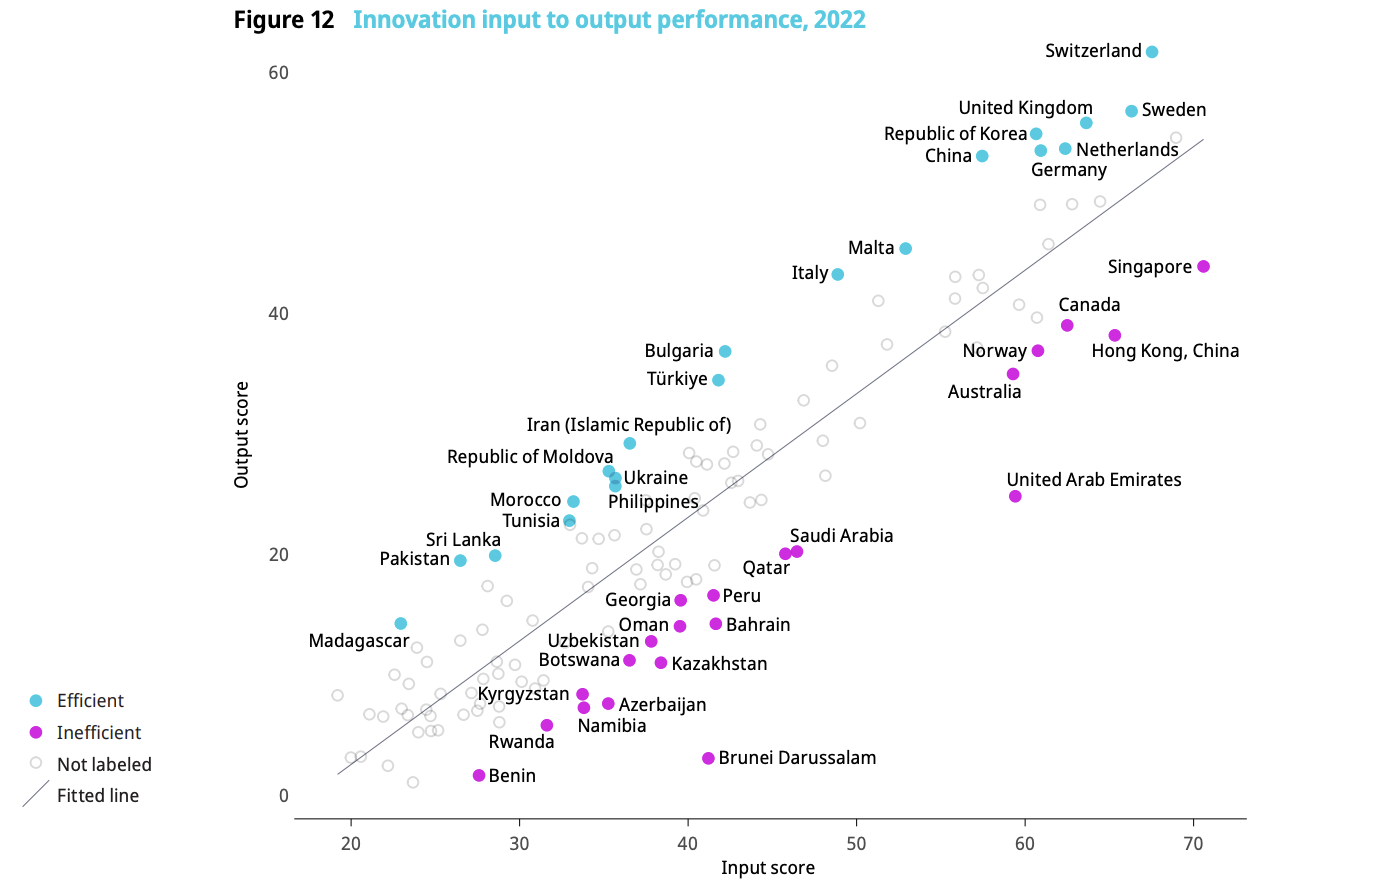

In [35]:
Image(filename='Part2_visualization/figure12.png')


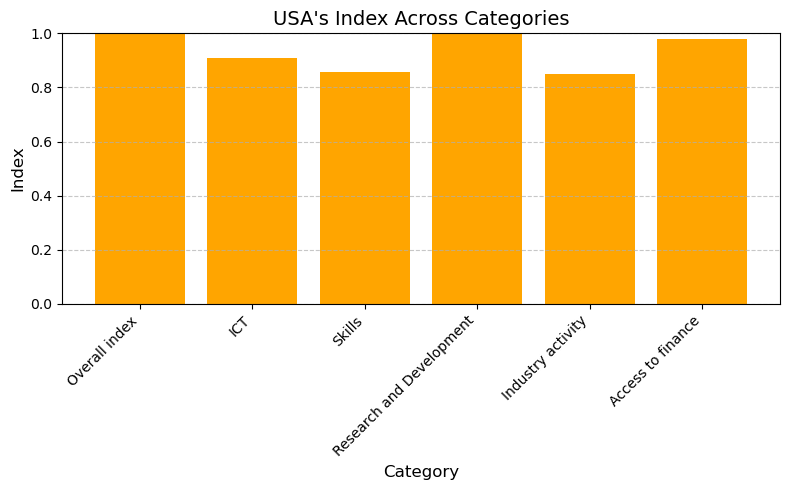

In [33]:
df = pd.read_csv("Part1 data/US_FTRI_20230628035959.csv")

# Filter data for Canada
canada_data = df[df["Economy Label"] == "United States of America"]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(canada_data["Category Label"], canada_data["Index"], color='orange')

# Add labels and title
plt.title("USA's Index Across Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Index", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

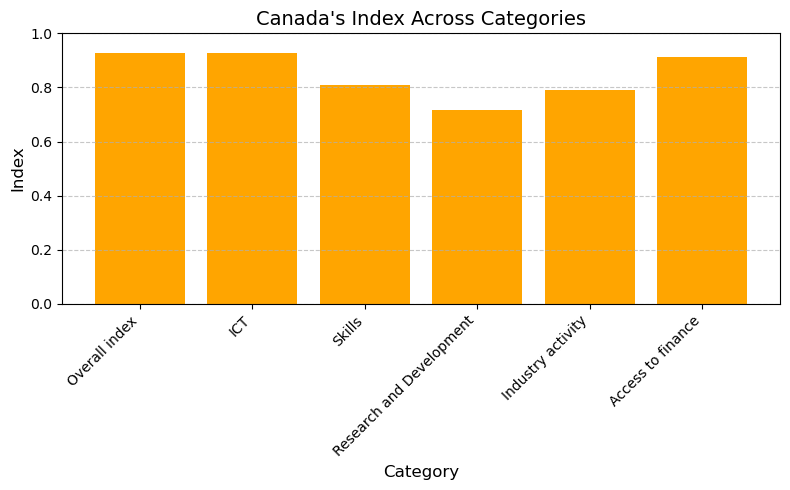

In [30]:
df = pd.read_csv("Part1 data/US_FTRI_20230628035959.csv")

# Filter data for Canada
canada_data = df[df["Economy Label"] == "Canada"]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(canada_data["Category Label"], canada_data["Index"], color='orange')

# Add labels and title
plt.title("Canada's Index Across Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Index", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## USA's Expenditures 2021-2022
reference(https://www.census.gov/library/publications/2023/econ/2022-aces-summary.html#tables)

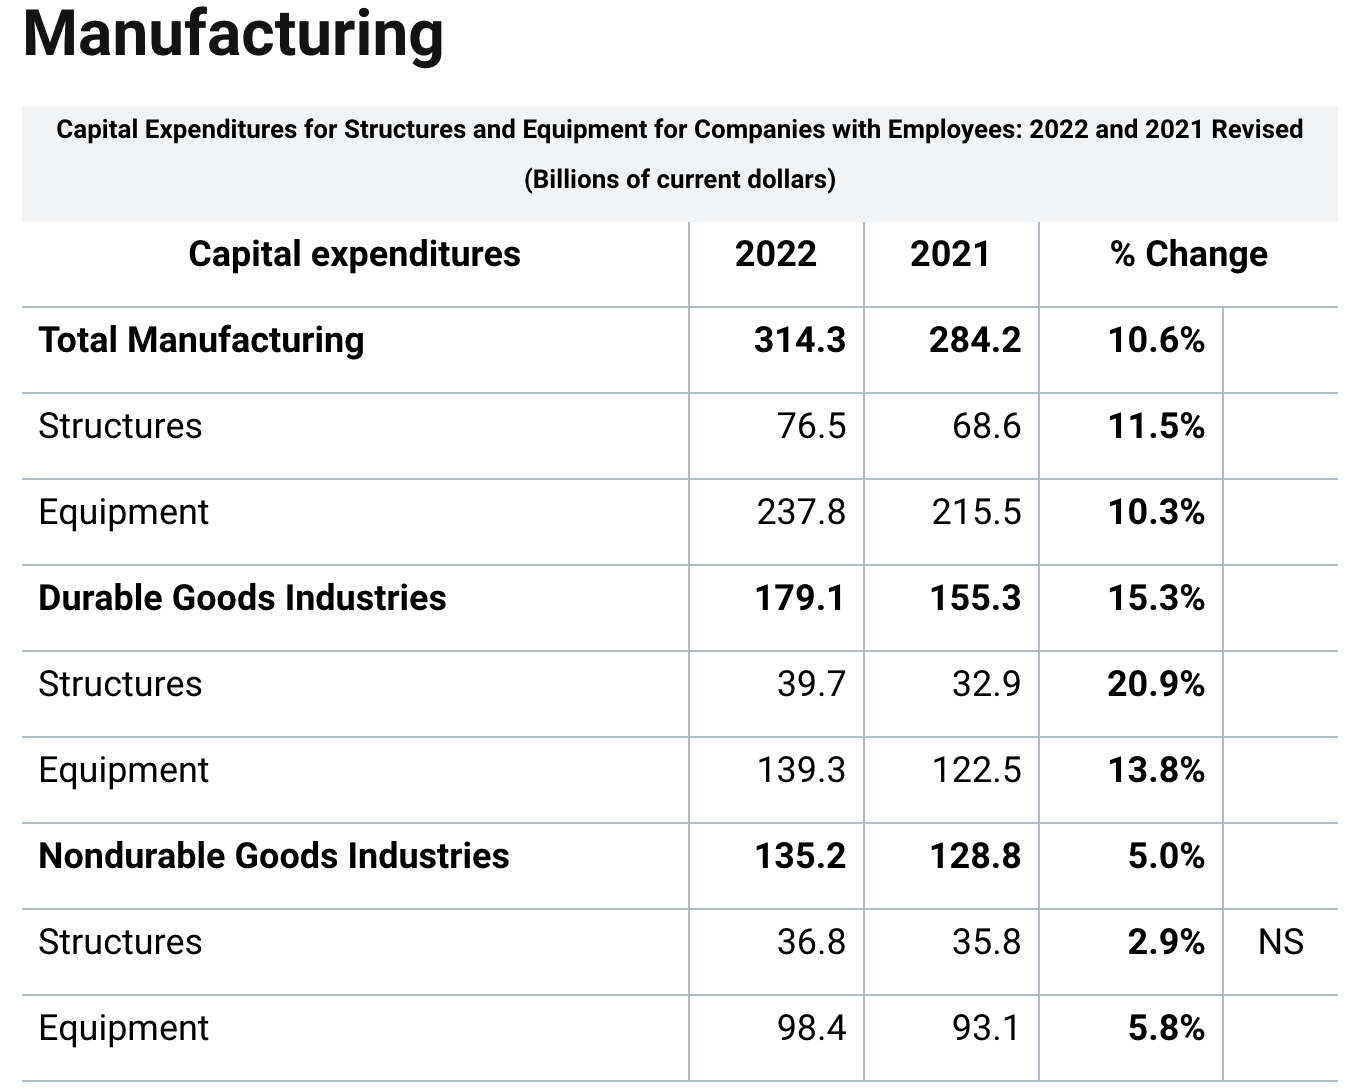

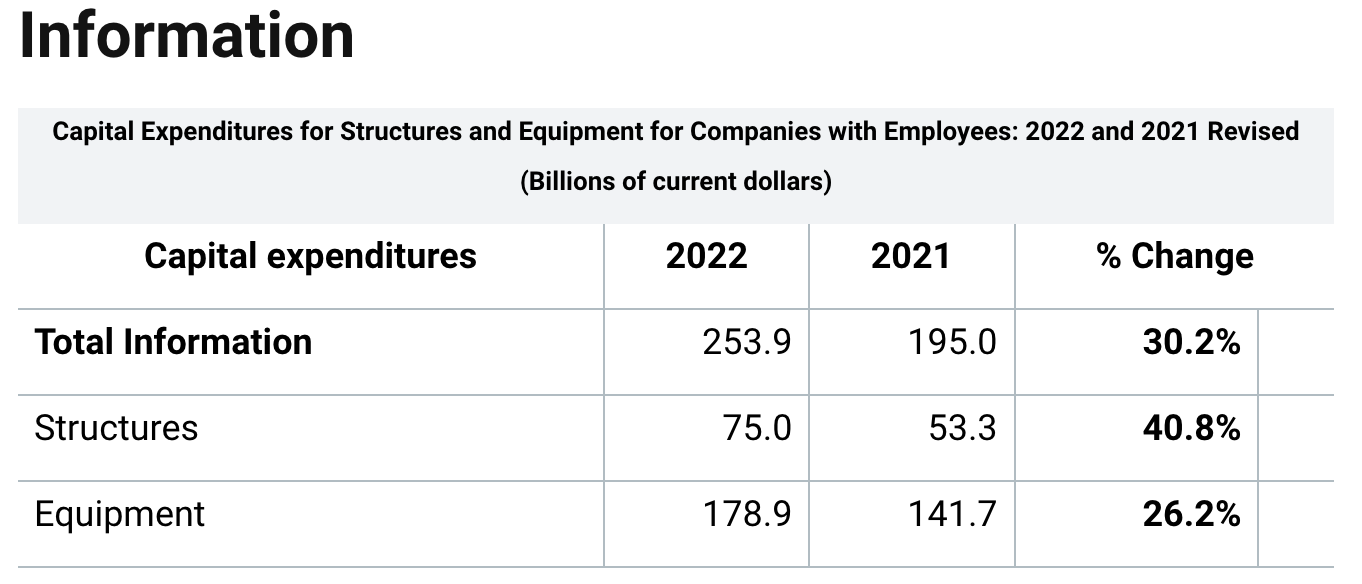

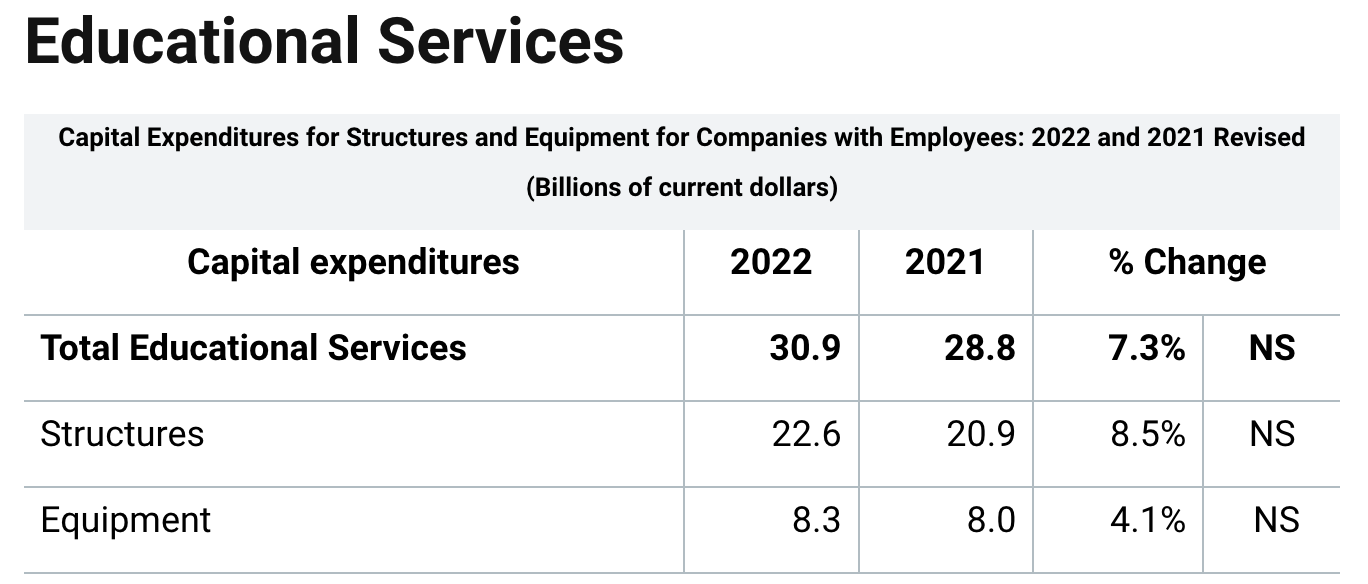

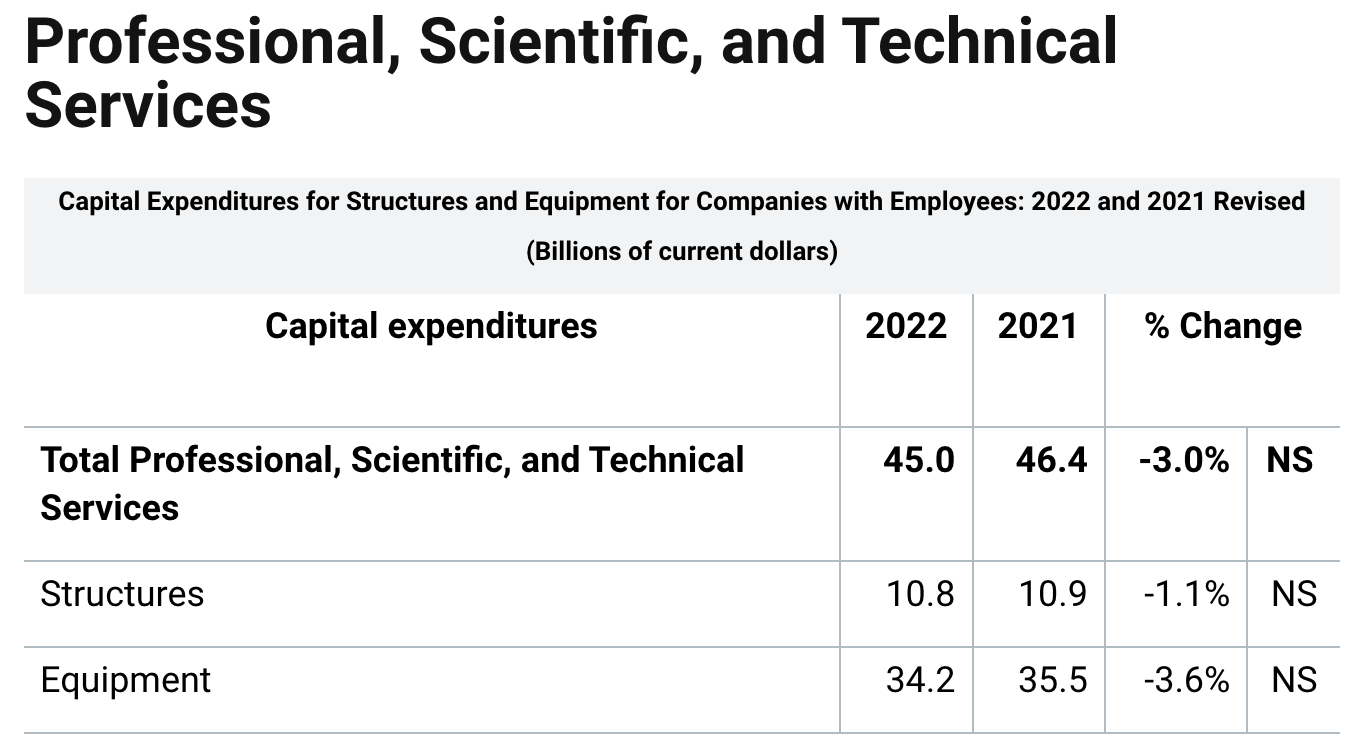

In [59]:
from IPython.display import Image, display

# File paths for the images
image_paths = [
    "Part2_visualization/usa1.png",
    "Part2_visualization/usa2.png",
    "Part2_visualization/usa3.png",
    "Part2_visualization/usa4.png"
]

# Display all images in one block
images = [Image(filename=path) for path in image_paths]
display(*images)


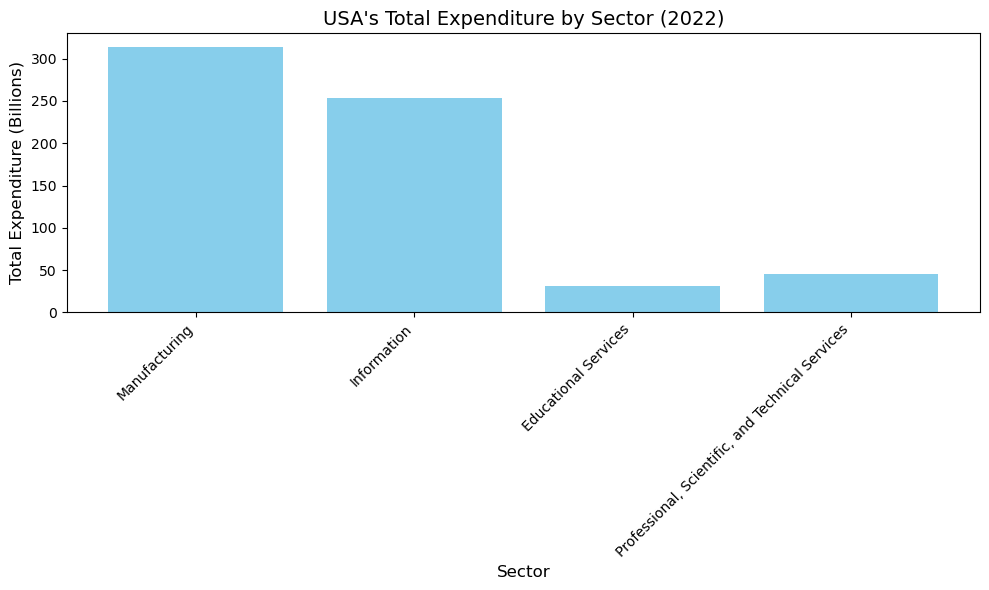

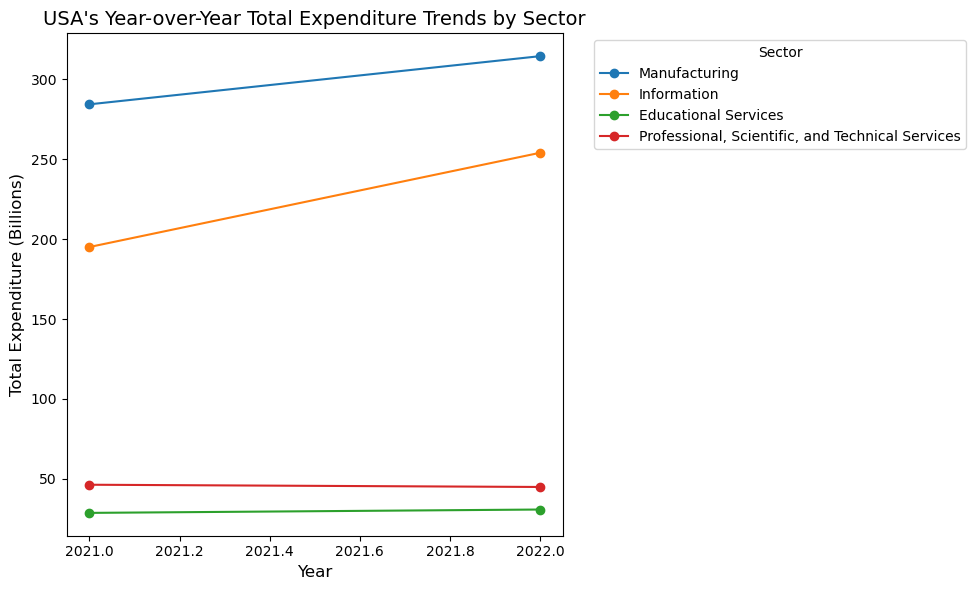

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the tables
data = {
    "Sector": [
        "Manufacturing", "Manufacturing", "Information", "Information",
        "Educational Services", "Educational Services", 
        "Professional, Scientific, and Technical Services", 
        "Professional, Scientific, and Technical Services"
    ],
    "Year": [2022, 2021, 2022, 2021, 2022, 2021, 2022, 2021],
    "Total Expenditure (Billions)": [314.3, 284.2, 253.9, 195.0, 30.9, 28.8, 45.0, 46.4],
    "Structures (Billions)": [76.5, 68.6, 75.0, 53.3, 22.6, 20.9, 10.8, 10.9],
    "Equipment (Billions)": [237.8, 215.5, 178.9, 141.7, 8.3, 8.0, 34.2, 35.5],
    "% Change": ["10.6%", "", "30.2%", "", "7.3%", "", "-3.0%", ""]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Bar chart: Total expenditure by sector (2022)
df_2022 = df[df["Year"] == 2022]
plt.figure(figsize=(10, 6))
plt.bar(df_2022["Sector"], df_2022["Total Expenditure (Billions)"], color="skyblue")
plt.title("USA's Total Expenditure by Sector (2022)", fontsize=14)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Total Expenditure (Billions)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Line plot: Year-over-year total expenditure trends
plt.figure(figsize=(10, 6))
for sector in df["Sector"].unique():
    sector_data = df[df["Sector"] == sector]
    plt.plot(sector_data["Year"], sector_data["Total Expenditure (Billions)"], marker="o", label=sector)

plt.title("USA's Year-over-Year Total Expenditure Trends by Sector", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Expenditure (Billions)", fontsize=12)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
